In [1]:
import warnings

warnings.filterwarnings("ignore")
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
PATH = '/home/daniel/Github-repo/Halloween-Classification/datasets'
train_basic_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/TRAIN-BASIC/"
test_basic_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/TEST-BASIC/"
val_basic_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/val-basic/"

train_non_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/TRAIN-NON/"
test_non_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/TEST-NON/"
val_non_path = "/home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/val_non/"




In [2]:

####################
# Image/classes count
####################
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d)
print("There are ", len(classes), "classes:\n", classes)
path, dirs, trainbasic_files = next(os.walk(train_basic_path))
path, dirs, testBasic_files = next(os.walk(test_basic_path))
train = len(trainbasic_files)
test = len(testBasic_files)
print("There are {} Basic TRAIN Images\nThere are {} TEST Basic Images".format(train, test))


There are  2 classes:
 ['BASIC', 'NON-BASIC']
There are 1724 Basic TRAIN Images
There are 847 TEST Basic Images


In [3]:

######################
# Check image validation
#######################
count = 0
paths = [train_basic_path, test_basic_path,val_basic_path, train_non_path, test_non_path, val_non_path]
for img_path in paths:
    print("Checking...{}\n".format(img_path))
    for filename in listdir(img_path):
        if filename.endswith('.jpg'):
            try:
                img = Image.open(img_path + filename)  # open the image file
                img.verify()  # verify that it is, in fact an image

            except (IOError, SyntaxError) as e:
                print('Bad file:', filename)  # print out the names of corrupt files
                count += 1
                os.remove(img_path + filename)  # remove any bad files
print("there are {} bad file(s)".format(count))


Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/TRAIN-BASIC/

Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/TEST-BASIC/

Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/BASIC/val-basic/

Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/TRAIN-NON/

Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/TEST-NON/

Checking.../home/daniel/Github-repo/Halloween-Classification/datasets/NON-BASIC/val_non/

there are 0 bad file(s)



#########################
# read image files --> select resolution
##########################


(256, 256, 3)


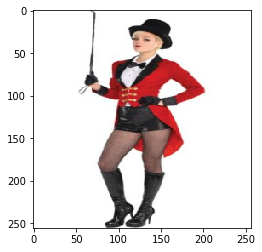

In [25]:
basic_train = [] 
basic_test = [] 
train_labels = [] 
test_labels = [] 
non_train = [] 
non_test = []
val_basic, val_basic_labels = [], []
val_non, val_non_labels= [],[]
SHAPE = 256
filename = listdir(train_basic_path) 
filename = filename[70]


image = cv2.imread(train_basic_path +filename)

image = cv2.resize(image, (SHAPE, SHAPE)) # Temporary size 
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image) 
plt.show()



In [6]:
for myFile in listdir(train_basic_path):
    image = cv2.imread(train_basic_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))  # Temporary size
    basic_train.append(image)
    train_labels.append(1)
print("Done")
for myFile in listdir(test_basic_path):
    image = cv2.imread(test_basic_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))
    basic_test.append(image)
    test_labels.append(1)
print("Done")


for myFile in listdir(val_basic_path):
    image = cv2.imread(val_basic_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))
    val_basic.append(image)
    val_basic_labels.append(1)
print("Done")

for myFile in listdir(val_non_path):
    image = cv2.imread(val_non_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))
    val_non.append(image)
    val_non_labels.append(0)
print("Done")

for myFile in listdir(train_non_path):
    image = cv2.imread(train_non_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))
    non_train.append(image)
    train_labels.append(0)
print("Done")
for myFile in listdir(test_non_path): 
    image = cv2.imread(test_non_path + myFile)
    image = cv2.resize(image, (SHAPE, SHAPE))
    non_test.append(image)
    test_labels.append(0)
print("Done")
X_train = basic_train + non_train
y_train = train_labels
X_test = basic_test + non_test
y_test = test_labels
X_val = val_basic + val_non
y_val = val_basic_labels + val_non_labels

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_val = np.array(X_val)
y_val = np.array(y_val)
np.savez_compressed('halloween_classes.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test,
                    X_val = X_val,
                    y_val = y_val)

Done
Done
Done
Done
Done
Done


In [7]:
class load_file:
    def __init__(self, file):
        self.file = file

    def get_data(self):
        hal = np.load(self.file)
        X_train, y_train, X_test, y_test,X_val, y_val = [hal[f] for f in hal.files]
        return X_train, y_train, X_test, y_test,X_val, y_val 
    
df = load_file('halloween_classes.npz')
X_train, y_train, X_test, y_test,X_val, y_val  = df.get_data()





In [8]:
#Now that we have our dataset in our dispose, we have to shuffle our dataset

#Lets first shuffle our training data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train= X_train[indices]
y_train = y_train[indices]


# Now our testing data
test_indices = np.arange(X_test.shape[0])

np.random.shuffle(test_indices)
X_test= X_test[test_indices]
y_test = y_test[test_indices]



val_indices = np.arange(X_val.shape[0])
np.random.shuffle(val_indices)
X_val = X_val[val_indices]
y_val = y_val[val_indices]


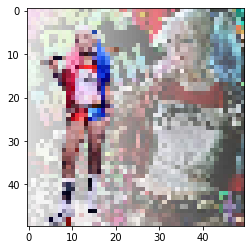

NOT BASIC


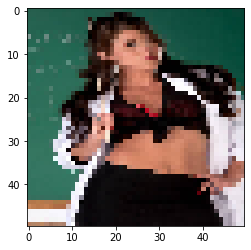

BASIC


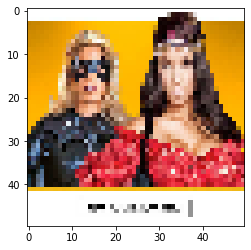

BASIC


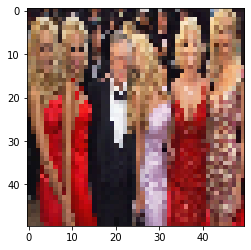

BASIC


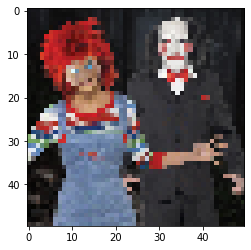

NOT BASIC


In [24]:
#cHECK TO SEE IF THE DATA AND LABELS WERE SHUFFLED CORRECLTY AND IN ORDER
for idx, i in enumerate(y_val):
    if i == 1:
        image=X_val[idx]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()
        print("BASIC")
    else:
        image=X_val[idx]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()
        print("NOT BASIC")
        
    if idx ==4:
        break
        


In [10]:
# Lets Start implementing our model for cnn using keras.
# We will start by importing the important libraries
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization 
from keras import backend as K
from sklearn import preprocessing
from keras.utils import to_categorical

Using TensorFlow backend.


In [11]:
input_shape = (50,50,3)
kernel_size = (1,1)
batch_size = 64

epochs = 50
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.15))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.50))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.6))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.6))

cnn4.add(Dense(1, activation='sigmoid'))

cnn4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W1202 19:10:37.790601 548405690384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1202 19:10:39.527371 548405690384 nn_ops.py:4262] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W1202 19:10:40.206286 548405690384 nn_ops.py:4262] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W1202 19:10:40.600635 548405690384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:

# 5 epochs -> 73.56% acc. batch size: 32
# 15 epochs ->
train_datagen = ImageDataGenerator( 
                        rescale=0.0/255
                        )
   

train_generator = train_datagen.flow(x=X_train, y=y_train, batch_size=batch_size)

history = cnn4.fit_generator(train_generator, validation_data=(X_val,y_val), 
                   steps_per_epoch=len(X_train)//batch_size, epochs=epochs)


W1202 19:10:58.698027 548405690384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/50
54/54 [==============================] - 139s 3s/step - loss: 0.8793 - accuracy: 0.6207 - val_loss: 1.2465 - val_accuracy: 0.5809
Epoch 2/50
54/54 [==============================] - 135s 2s/step - loss: 0.7577 - accuracy: 0.6492 - val_loss: 0.8697 - val_accuracy: 0.6128
Epoch 3/50
54/54 [==============================] - 134s 2s/step - loss: 0.6604 - accuracy: 0.6892 - val_loss: 0.5729 - val_accuracy: 0.7298
Epoch 4/50
54/54 [==============================] - 135s 3s/step - loss: 0.6264 - accuracy: 0.7069 - val_loss: 0.4982 - val_accuracy: 0.7489
Epoch 5/50
54/54 [==============================] - 134s 2s/step - loss: 0.6302 - accuracy: 0.7000 - val_loss: 0.6092 - val_accuracy: 0.6936
Epoch 6/50
54/54 [==============================] - 136s 3s/step - loss: 0.5643 - accuracy: 0.7181 - val_loss: 0.5137 - val_accuracy: 0.7383
Epoch 7/50
54/54 [==============================] - 136s 3s/step - loss: 0.5336 - accuracy: 0.7440 - val_loss: 0.5821 - val_accuracy: 0.7234
Epoch 8/50
54

In [13]:
from sklearn.metrics import confusion_matrix
import itertools 
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


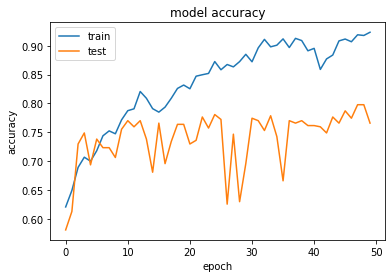

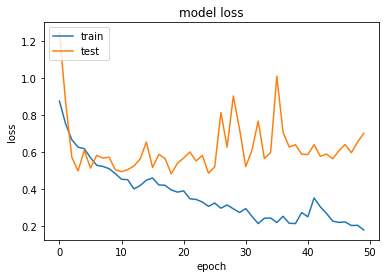

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
cm =confusion_matrix(y_test, rounded_predictions)

Confusion matrix, without normalization
[[688 136]
 [237 610]]


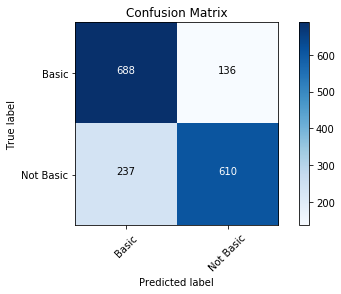

In [18]:
labels = ['Basic', 'Not Basic']
plot_confusion_matrix(cm, labels, title='Confusion Matrix')

In [19]:
test_batches = ImageDataGenerator().flow(X_test,batch_size=batch_size)
image_datas= next(test_batches)

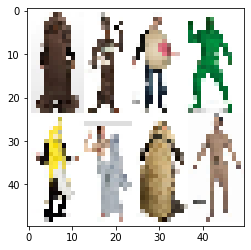

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


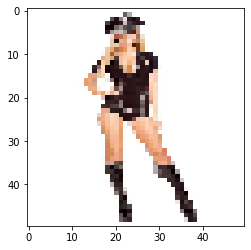

BASIC
PREDICTED: [1]
ACTUAL: 1


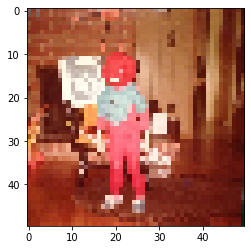

BASIC
PREDICTED: [1]
ACTUAL: 0


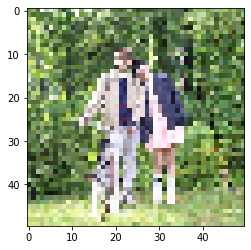

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


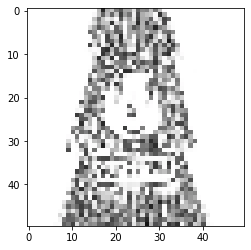

NOT BASIC
PREDICTED: [0]
ACTUAL: 1


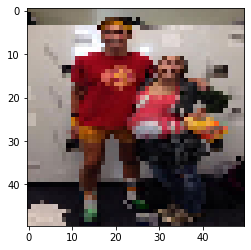

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


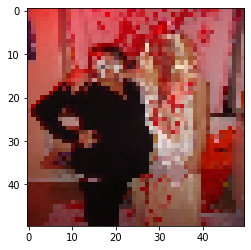

BASIC
PREDICTED: [1]
ACTUAL: 0


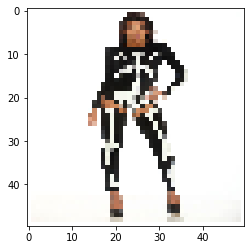

BASIC
PREDICTED: [1]
ACTUAL: 0


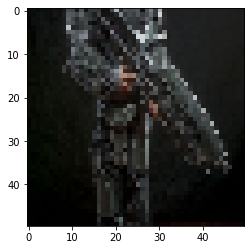

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


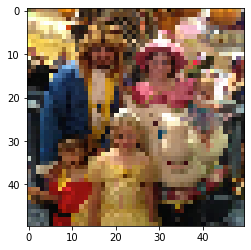

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


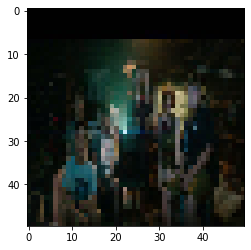

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


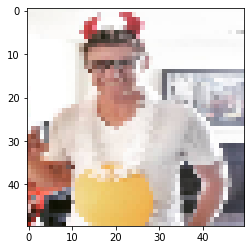

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


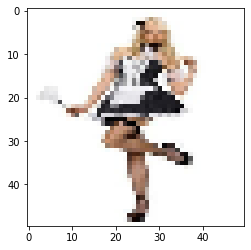

BASIC
PREDICTED: [1]
ACTUAL: 1


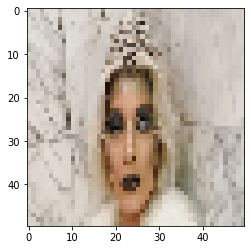

BASIC
PREDICTED: [1]
ACTUAL: 1


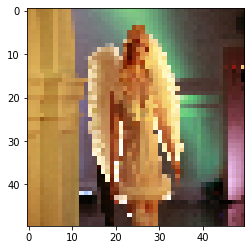

BASIC
PREDICTED: [1]
ACTUAL: 1


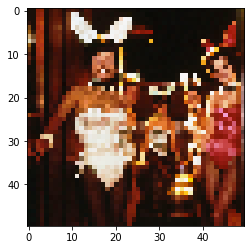

NOT BASIC
PREDICTED: [0]
ACTUAL: 1


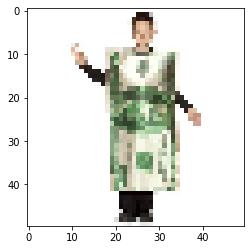

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


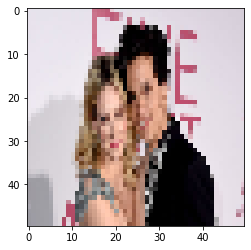

BASIC
PREDICTED: [1]
ACTUAL: 0


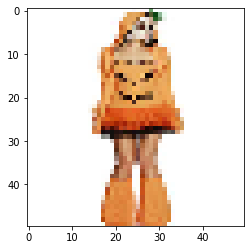

BASIC
PREDICTED: [1]
ACTUAL: 1


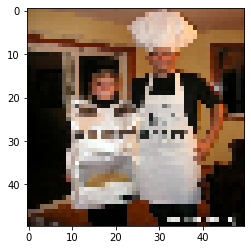

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


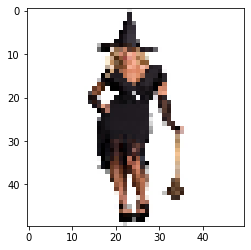

BASIC
PREDICTED: [1]
ACTUAL: 1


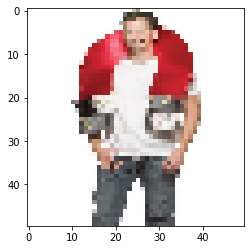

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


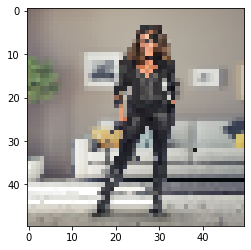

BASIC
PREDICTED: [1]
ACTUAL: 1


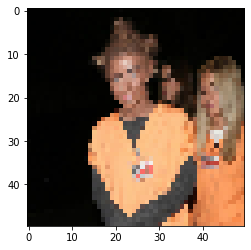

BASIC
PREDICTED: [1]
ACTUAL: 0


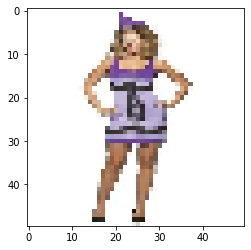

BASIC
PREDICTED: [1]
ACTUAL: 1


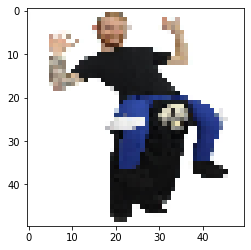

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


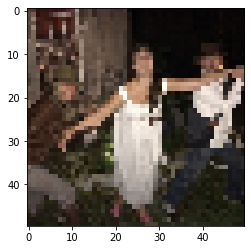

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


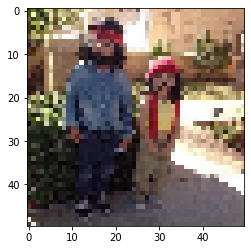

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


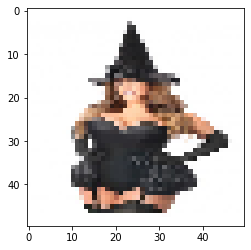

BASIC
PREDICTED: [1]
ACTUAL: 1


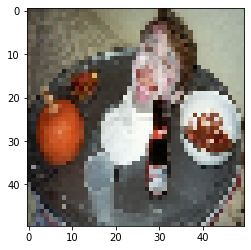

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


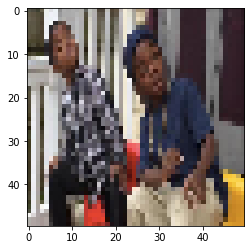

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


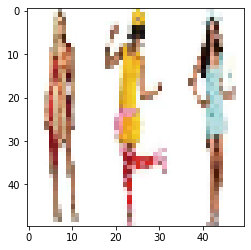

NOT BASIC
PREDICTED: [0]
ACTUAL: 1


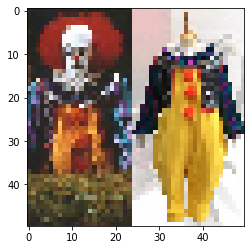

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


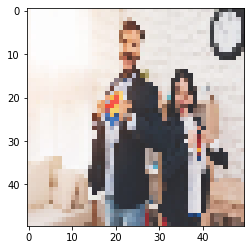

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


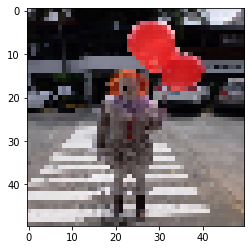

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


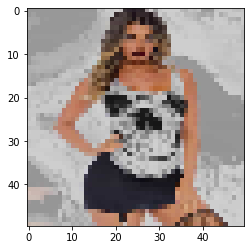

BASIC
PREDICTED: [1]
ACTUAL: 1


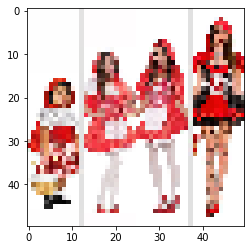

BASIC
PREDICTED: [1]
ACTUAL: 1


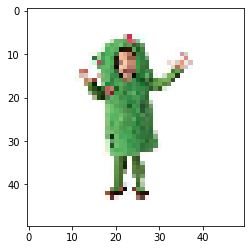

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


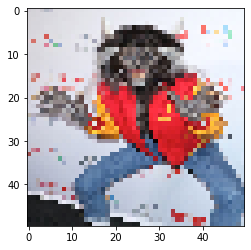

BASIC
PREDICTED: [1]
ACTUAL: 0


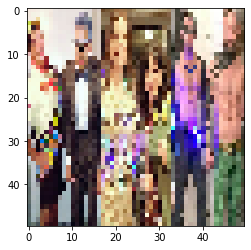

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


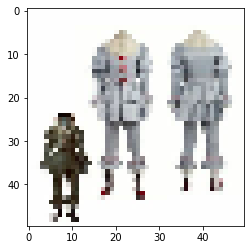

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


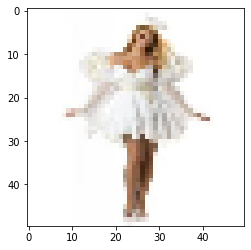

BASIC
PREDICTED: [1]
ACTUAL: 1


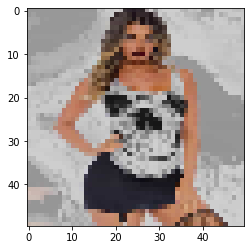

BASIC
PREDICTED: [1]
ACTUAL: 1


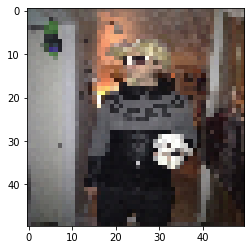

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


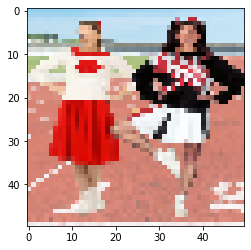

BASIC
PREDICTED: [1]
ACTUAL: 1


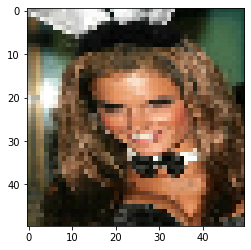

BASIC
PREDICTED: [1]
ACTUAL: 1


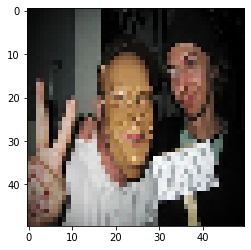

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


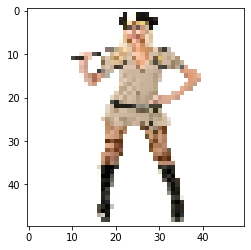

BASIC
PREDICTED: [1]
ACTUAL: 1


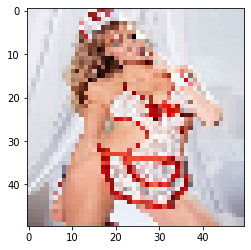

BASIC
PREDICTED: [1]
ACTUAL: 1


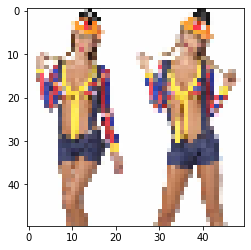

BASIC
PREDICTED: [1]
ACTUAL: 1


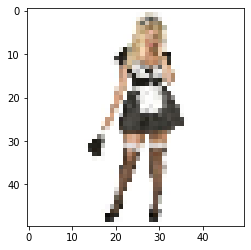

BASIC
PREDICTED: [1]
ACTUAL: 1


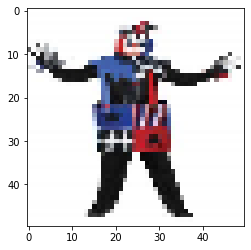

NOT BASIC
PREDICTED: [0]
ACTUAL: 1


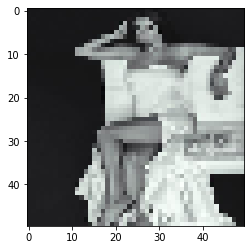

NOT BASIC
PREDICTED: [0]
ACTUAL: 1


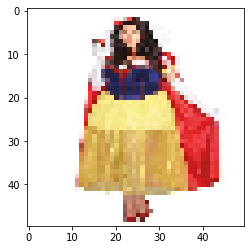

NOT BASIC
PREDICTED: [0]
ACTUAL: 1


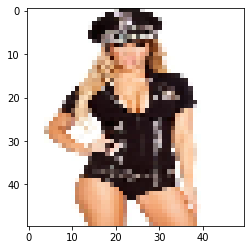

BASIC
PREDICTED: [1]
ACTUAL: 1


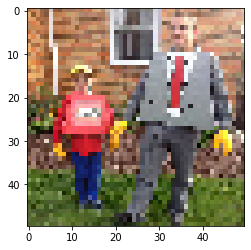

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


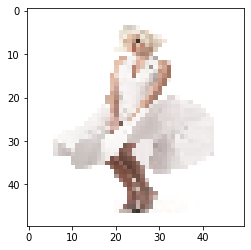

BASIC
PREDICTED: [1]
ACTUAL: 1


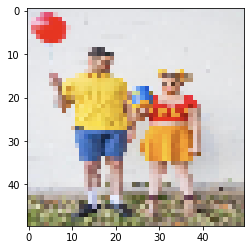

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


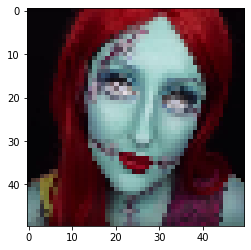

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


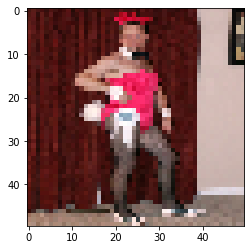

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


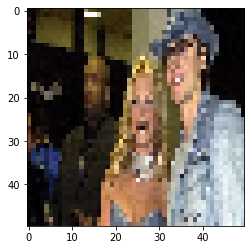

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


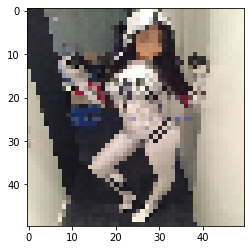

NOT BASIC
PREDICTED: [0]
ACTUAL: 1


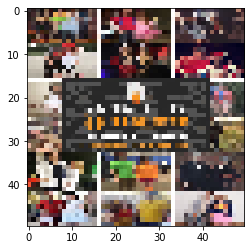

NOT BASIC
PREDICTED: [0]
ACTUAL: 0


KeyboardInterrupt: 

In [20]:
for idx, i in enumerate(rounded_predictions):
    if i == 1:
        image=X_test[idx]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()
        print("BASIC")
        print("PREDICTED: {}\nACTUAL: {}".format(i, y_test[idx]))
    else:
        image=X_test[idx]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()
        print("NOT BASIC")
        print("PREDICTED: {}\nACTUAL: {}".format(i, y_test[idx]))
        

In [21]:
loss,acc = cnn4.evaluate(X_test, y_test, batch_size=batch_size)

print("Results:\nERROR LOSS:{}\nACC: {}%".format(loss, round(acc*100)))
X_test.shape

1671/1671 [==============================] - 18s 11ms/step
Results:
ERROR LOSS:0.6560584587440171
ACC: 78%


(1671, 50, 50, 3)

In [22]:

cnn4.save("Halloween_model_edition.h5")
print("Saved model to disk")


Saved model to disk
